¡Bienvenido al Demo de Support Vector Machine!

Selecciona el tipo de datos:
1. Dataset Iris (recomendado para empezar)
2. Datos generados artificialmente (para ver fronteras no lineales)

Ingresa tu opción (1 o 2): 1
INICIANDO DEMOSTRACIÓN DE SUPPORT VECTOR MACHINE (SVM)
=== CARGANDO DATASET IRIS ===
Características seleccionadas: ['sepal length (cm)', 'sepal width (cm)']
Clases seleccionadas: ['setosa' 'versicolor']
Número total de muestras: 100

=== PREPARANDO DATOS ===
Muestras de entrenamiento: 70
Muestras de prueba: 30

=== ENTRENANDO MODELOS SVM ===
Entrenando SVM con kernel lineal...
Entrenando SVM con kernel RBF...
Entrenando SVM con kernel polinomial...
Todos los modelos han sido entrenados.

=== EVALUANDO MODELOS ===

--- Modelo LINEAL ---
Precisión: 1.000 (100.0%)
Vectores de soporte: 10
Reporte de clasificación:
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00        15
     Clase 1       1.00      1.00      1.00        15


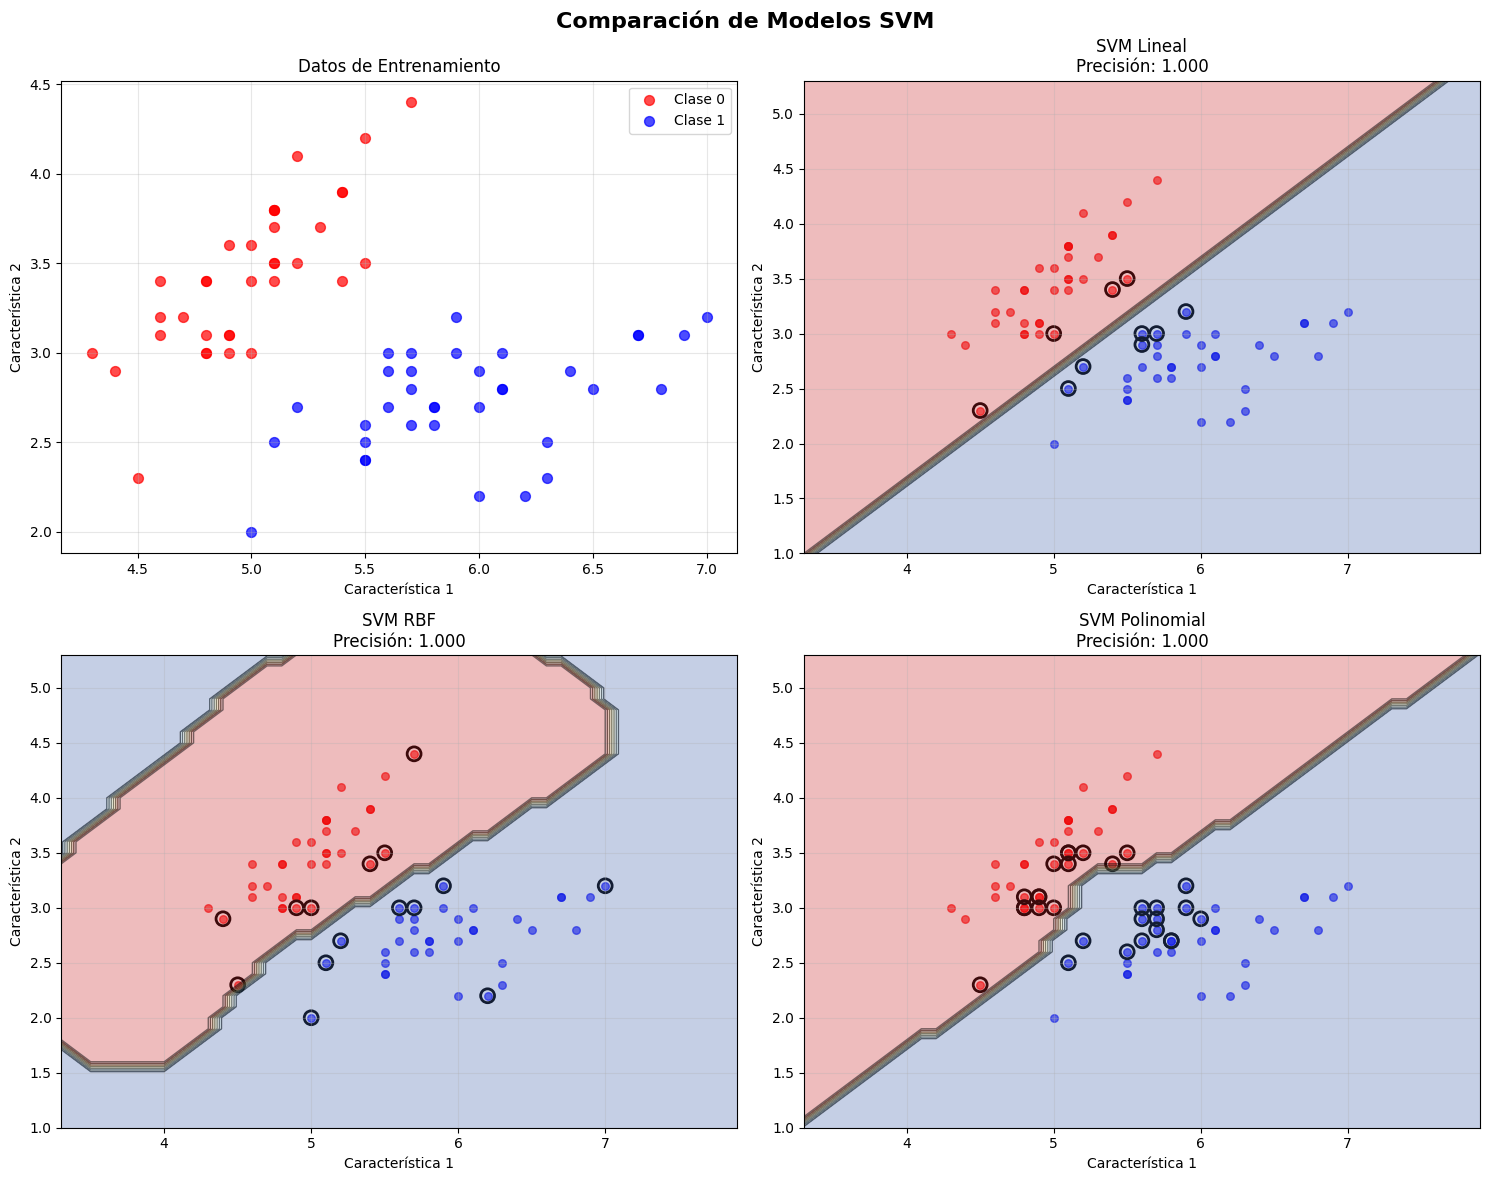

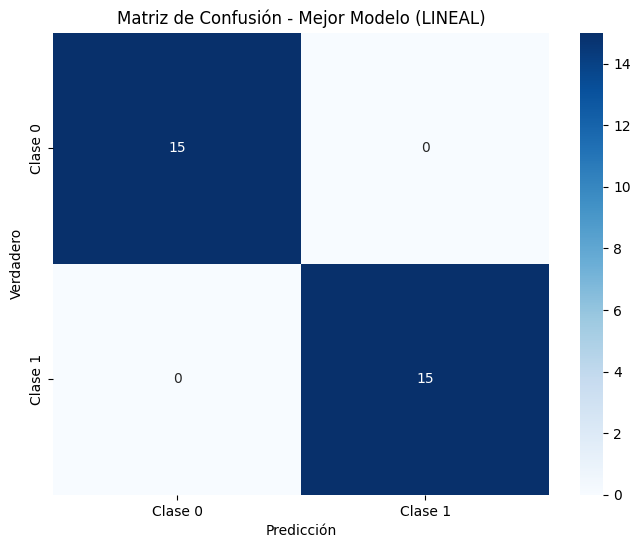


=== EJEMPLO DE PREDICCIÓN INDIVIDUAL ===
Mejor modelo seleccionado: LINEAL

Punto nuevo: [4.5 2.8]
Predicción: Clase 0
Probabilidades:
  - Clase 0: 0.961 (96.1%)
  - Clase 1: 0.039 (3.9%)

RESUMEN FINAL
LINEAL      : 1.000 (100.0%)
RBF         : 1.000 (100.0%)
POLY        : 1.000 (100.0%)

Mejor modelo: LINEAL
Precisión del mejor modelo: 1.000 (100.0%)

Demostración completada.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

class DemoSVM:
    """
    Clase diseñada para demostrar el funcionamiento de Support Vector Machines (SVM)
    con diferentes kernels (lineal, RBF y polinomial).
    Incluye:
    - Generación y carga de datasets.
    - Preprocesamiento de datos.
    - Entrenamiento y evaluación de modelos.
    - Visualización de fronteras de decisión y métricas de rendimiento.
    """

    def __init__(self):
        """
        Constructor de la clase DemoSVM.
        Atributos:
            - modelos: Diccionario para almacenar los modelos SVM entrenados.
            - scaler: Instancia de StandardScaler para normalización de datos.
            - X_train, X_test, y_train, y_test: Conjuntos de entrenamiento y prueba.
        """
        self.modelos = {}  # Almacena los modelos SVM entrenados
        self.scaler = StandardScaler()  # Normaliza los datos (media=0, desviación=1)
        self.X_train = None  # Datos de entrenamiento (características)
        self.X_test = None   # Datos de prueba (características)
        self.y_train = None  # Etiquetas de entrenamiento
        self.y_test = None   # Etiquetas de prueba

    def generar_datos_ejemplo(self):
        """
        Genera un dataset sintético no linealmente separable para demostrar SVM.
        - Clase 0: Puntos distribuidos en un círculo pequeño centrado en (1,1).
        - Clase 1: Puntos distribuidos en un anillo alrededor del círculo pequeño.
        Objetivo: Mostrar cómo SVM con kernel RBF puede separar datos no lineales.
        """
        print("=== GENERANDO DATOS DE EJEMPLO ===")

        np.random.seed(42)  # Semilla para reproducibilidad
        n_samples = 100  # Número total de muestras

        # Clase 0: Distribución normal centrada en (1,1) con desviación estándar 0.5
        clase_0 = np.random.randn(n_samples//2, 2) * 0.5 + np.array([1, 1])

        # Clase 1: Puntos en un anillo (radio entre 2.5 y 3.5)
        angulos = np.random.uniform(0, 2*np.pi, n_samples//2)  # Ángulos aleatorios
        radios = np.random.uniform(2.5, 3.5, n_samples//2)     # Radios aleatorios
        clase_1_x = radios * np.cos(angulos)  # Coordenadas x
        clase_1_y = radios * np.sin(angulos)  # Coordenadas y
        clase_1 = np.column_stack((clase_1_x, clase_1_y))  # Unir coordenadas

        # Combinar datos y etiquetas
        X = np.vstack((clase_0, clase_1))
        y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))

        return X, y

    def cargar_dataset_iris(self):
        """
        Carga el dataset Iris de scikit-learn.
        - Selecciona solo las primeras dos características (longitud y ancho del sépalo).
        - Filtra para usar solo las clases 0 (setosa) y 1 (versicolor).
        Justificación: Simplificar la visualización y demostración del algoritmo.
        """
        print("=== CARGANDO DATASET IRIS ===")
        iris = datasets.load_iris()

        # Seleccionar solo las primeras dos características
        X = iris.data[:, :2]
        y = iris.target

        # Filtrar para quedarse con las clases 0 y 1
        mask = y != 2
        X = X[mask]
        y = y[mask]

        print(f"Características seleccionadas: {iris.feature_names[:2]}")
        print(f"Clases seleccionadas: {iris.target_names[:2]}")
        print(f"Número total de muestras: {len(X)}")

        return X, y

    def preparar_datos(self, X, y):
        """
        Preprocesamiento de datos:
        1. División en conjuntos de entrenamiento (70%) y prueba (30%) con estratificación.
        2. Normalización de características (escalado estándar).
        La estratificación garantiza que la proporción de clases se mantenga en ambos conjuntos.
        La normalización es crítica para SVM, ya que es sensible a la escala de los datos.
        """
        print("\n=== PREPARANDO DATOS ===")

        # División estratificada para mantener la proporción de clases
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        # Normalización: media=0, varianza=1
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        print(f"Muestras de entrenamiento: {len(self.X_train)}")
        print(f"Muestras de prueba: {len(self.X_test)}")

    def entrenar_modelos(self):
        """
        Entrena tres modelos SVM con diferentes kernels:
        1. Kernel lineal: Para datos linealmente separables.
        2. Kernel RBF (Gaussiano): Para datos no lineales (recomendado por defecto).
        3. Kernel polinomial: Para relaciones polinomiales entre características.
        Parámetros:
            - C=1.0: Parámetro de regularización (trade-off entre margen y error de clasificación).
            - gamma='scale': Ancho del kernel RBF (1/(n_características * varianza)).
            - degree=3: Grado del kernel polinomial.
        """
        print("\n=== ENTRENANDO MODELOS SVM ===")

        # Kernel lineal: Frontera de decisión lineal
        print("Entrenando SVM con kernel lineal...")
        self.modelos['lineal'] = svm.SVC(kernel='linear', C=1.0, random_state=42)
        self.modelos['lineal'].fit(self.X_train_scaled, self.y_train)

        # Kernel RBF: Frontera de decisión no lineal (recomendado para datos complejos)
        print("Entrenando SVM con kernel RBF...")
        self.modelos['rbf'] = svm.SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
        self.modelos['rbf'].fit(self.X_train_scaled, self.y_train)

        # Kernel polinomial: Frontera de decisión polinomial
        print("Entrenando SVM con kernel polinomial...")
        self.modelos['poly'] = svm.SVC(kernel='poly', degree=3, C=1.0, random_state=42)
        self.modelos['poly'].fit(self.X_train_scaled, self.y_train)

        print("Todos los modelos han sido entrenados.")

    def evaluar_modelos(self):
        """
        Evalúa el rendimiento de los modelos usando:
        - Precisión (accuracy): Proporción de predicciones correctas.
        - Reporte de clasificación: Precision, recall y f1-score por clase.
        - Vectores de soporte: Puntos críticos que definen la frontera de decisión.
        """
        print("\n=== EVALUANDO MODELOS ===")
        resultados = {}

        for nombre, modelo in self.modelos.items():
            y_pred = modelo.predict(self.X_test_scaled)
            precision = accuracy_score(self.y_test, y_pred)

            resultados[nombre] = {
                'precision': precision,
                'predicciones': y_pred,
                'modelo': modelo
            }

            print(f"\n--- Modelo {nombre.upper()} ---")
            print(f"Precisión: {precision:.3f} ({precision*100:.1f}%)")
            print(f"Vectores de soporte: {len(modelo.support_)}")
            print("Reporte de clasificación:")
            print(classification_report(self.y_test, y_pred, target_names=['Clase 0', 'Clase 1']))

        return resultados

    def visualizar_resultados(self, resultados):
        """
        Visualización de resultados:
        1. Datos de entrenamiento.
        2. Fronteras de decisión y vectores de soporte para cada modelo.
        3. Matriz de confusión del mejor modelo.
        Objetivo: Comparar cómo cada kernel separa los datos y su rendimiento.
        """
        print("\n=== GENERANDO VISUALIZACIONES ===")

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Comparación de Modelos SVM', fontsize=16, fontweight='bold')
        colores = ['red', 'blue']

        # Gráfico 1: Datos originales de entrenamiento
        ax = axes[0, 0]
        for i in range(2):
            mask = self.y_train == i
            ax.scatter(self.X_train[mask, 0], self.X_train[mask, 1],
                      c=colores[i], label=f'Clase {i}', alpha=0.7, s=50)
        ax.set_title('Datos de Entrenamiento')
        ax.set_xlabel('Característica 1')
        ax.set_ylabel('Característica 2')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Gráficos 2-4: Fronteras de decisión y vectores de soporte
        posiciones = [(0, 1), (1, 0), (1, 1)]
        nombres_modelos = ['lineal', 'rbf', 'poly']
        titulos = ['SVM Lineal', 'SVM RBF', 'SVM Polinomial']

        for idx, (nombre, titulo) in enumerate(zip(nombres_modelos, titulos)):
            ax = axes[posiciones[idx]]
            modelo = resultados[nombre]['modelo']
            precision = resultados[nombre]['precision']

            # Dibujar datos de entrenamiento
            for i in range(2):
                mask = self.y_train == i
                ax.scatter(self.X_train[mask, 0], self.X_train[mask, 1],
                          c=colores[i], alpha=0.6, s=30)

            # Dibujar vectores de soporte (puntos críticos)
            vectores_soporte = self.X_train[modelo.support_]
            ax.scatter(vectores_soporte[:, 0], vectores_soporte[:, 1],
                      s=100, facecolors='none', edgecolors='black', linewidths=2)

            # Crear malla para visualizar la frontera de decisión
            h = 0.1
            x_min, x_max = self.X_train[:, 0].min() - 1, self.X_train[:, 0].max() + 1
            y_min, y_max = self.X_train[:, 1].min() - 1, self.X_train[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                np.arange(y_min, y_max, h))
            malla_puntos = np.c_[xx.ravel(), yy.ravel()]
            malla_puntos_scaled = self.scaler.transform(malla_puntos)
            Z = modelo.predict(malla_puntos_scaled)
            Z = Z.reshape(xx.shape)

            # Dibujar frontera de decisión
            ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
            ax.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.5)

            ax.set_title(f'{titulo}\nPrecisión: {precision:.3f}')
            ax.set_xlabel('Característica 1')
            ax.set_ylabel('Característica 2')
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Matriz de confusión del mejor modelo
        mejor_modelo = max(resultados.items(), key=lambda x: x[1]['precision'])
        nombre_mejor = mejor_modelo[0]
        info_mejor = mejor_modelo[1]

        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(self.y_test, info_mejor['predicciones'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Clase 0', 'Clase 1'],
                   yticklabels=['Clase 0', 'Clase 1'])
        plt.title(f'Matriz de Confusión - Mejor Modelo ({nombre_mejor.upper()})')
        plt.ylabel('Verdadero')
        plt.xlabel('Predicción')
        plt.show()

    def ejemplo_prediccion_individual(self):
        """
        Demostración de predicción individual con el mejor modelo.
        - Muestra la predicción y las probabilidades (si el modelo lo soporta).
        Objetivo: Ilustrar cómo se usa el modelo entrenado para clasificar nuevos datos.
        """
        print("\n=== EJEMPLO DE PREDICCIÓN INDIVIDUAL ===")

        # Seleccionar el mejor modelo según precisión
        mejor_modelo = max(self.modelos.items(),
                          key=lambda x: accuracy_score(self.y_test, x[1].predict(self.X_test_scaled)))
        nombre_mejor, modelo_mejor = mejor_modelo

        print(f"Mejor modelo seleccionado: {nombre_mejor.upper()}")

        # Punto nuevo para predecir (ejemplo: longitud=4.5, ancho=2.8)
        punto_nuevo = np.array([[4.5, 2.8]])
        punto_nuevo_scaled = self.scaler.transform(punto_nuevo)

        prediccion = modelo_mejor.predict(punto_nuevo_scaled)[0]

        # Calcular probabilidades si el modelo lo soporta
        try:
            modelo_prob = svm.SVC(kernel=modelo_mejor.kernel, C=1.0, probability=True, random_state=42)
            modelo_prob.fit(self.X_train_scaled, self.y_train)
            probabilidades = modelo_prob.predict_proba(punto_nuevo_scaled)[0]

            print(f"\nPunto nuevo: {punto_nuevo[0]}")
            print(f"Predicción: Clase {int(prediccion)}")
            print(f"Probabilidades:")
            print(f"  - Clase 0: {probabilidades[0]:.3f} ({probabilidades[0]*100:.1f}%)")
            print(f"  - Clase 1: {probabilidades[1]:.3f} ({probabilidades[1]*100:.1f}%)")
        except:
            print(f"\nPunto nuevo: {punto_nuevo[0]}")
            print(f"Predicción: Clase {int(prediccion)}")

    def ejecutar_demo_completa(self, usar_iris=True):
        """
        Ejecuta la demostración completa:
        1. Carga o genera datos.
        2. Preprocesa los datos.
        3. Entrena y evalúa modelos.
        4. Visualiza resultados.
        5. Muestra ejemplo de predicción.
        """
        print("INICIANDO DEMOSTRACIÓN DE SUPPORT VECTOR MACHINE (SVM)")
        print("=" * 60)

        # Cargar datos
        if usar_iris:
            X, y = self.cargar_dataset_iris()
        else:
            X, y = self.generar_datos_ejemplo()

        # Preparar datos
        self.preparar_datos(X, y)

        # Entrenar modelos
        self.entrenar_modelos()

        # Evaluar modelos
        resultados = self.evaluar_modelos()

        # Visualizar resultados
        self.visualizar_resultados(resultados)

        # Ejemplo de predicción individual
        self.ejemplo_prediccion_individual()

        # Resumen final
        print("\n" + "=" * 60)
        print("RESUMEN FINAL")
        print("=" * 60)

        mejor_precision = 0
        mejor_modelo_nombre = ""

        for nombre, info in resultados.items():
            precision = info['precision']
            print(f"{nombre.upper():<12}: {precision:.3f} ({precision*100:.1f}%)")
            if precision > mejor_precision:
                mejor_precision = precision
                mejor_modelo_nombre = nombre

        print(f"\nMejor modelo: {mejor_modelo_nombre.upper()}")
        print(f"Precisión del mejor modelo: {mejor_precision:.3f} ({mejor_precision*100:.1f}%)")
        print("\nDemostración completada.")

def main():
    """
    Función principal para ejecutar la demostración.
    Permite al usuario elegir entre el dataset Iris o datos sintéticos.
    """
    print("¡Bienvenido al Demo de Support Vector Machine!")
    print("\nSelecciona el tipo de datos:")
    print("1. Dataset Iris (recomendado para empezar)")
    print("2. Datos generados artificialmente (para ver fronteras no lineales)")

    while True:
        try:
            opcion = input("\nIngresa tu opción (1 o 2): ").strip()
            if opcion == '1':
                usar_iris = True
                break
            elif opcion == '2':
                usar_iris = False
                break
            else:
                print("Opción no válida. Ingresa 1 o 2.")
        except:
            print("Entrada inválida. Ingresa 1 o 2.")

    # Crear y ejecutar la demostración
    demo = DemoSVM()
    demo.ejecutar_demo_completa(usar_iris=usar_iris)

# Ejecutar el programa
if __name__ == "__main__":
    main()
